### Import libraries

In [1]:
from time import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import random
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, Imputer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from scipy.stats import randint
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn import metrics
from catboost import CatBoostClassifier
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

### Loading the data
<li> Bonds
<li> Yields
<li> Libor and Overnight Rates
<li> Exchange Rates
<li> Effective Exchange Rates
<li> US Mortgage Rates
<li> Case Shiller Index
<li> Major Market Indexes
<li> Commodities
<li> Dollar Index


In [2]:
bonds = pd.read_csv('./Bond Futures/all_bonds.csv')

In [3]:
bonds.Date = pd.to_datetime(bonds.Date)
bonds.set_index('Date', inplace=True)
bonds.head()

,us_2year_bond_futures,us_10year_bond_futures,us_30year_bond_features,uk_gilt,jpy_bond_price
Date,,,,,
1977-08-22,NaN,NaN,83.44,NaN,NaN
1977-08-23,NaN,NaN,83.81,NaN,NaN
1977-08-24,NaN,NaN,83.62,NaN,NaN
1977-08-25,NaN,NaN,83.88,NaN,NaN
1977-08-26,NaN,NaN,83.94,NaN,NaN


In [4]:
yields = pd.read_csv('./Yields/all_yields.csv')

In [5]:
yields.Date = pd.to_datetime(yields.Date)
yields.set_index('Date', inplace=True)
yields.head()

,us10_yield,uk10_yield,swis10_yield,eu10_yield,can10_yield,swed10_yield,ger10_yield,fra10_yield,ita10_yield,aus10_yield
Date,,,,,,,,,,
1993-11-01,NaN,7.0536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-11-02,NaN,7.0289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-11-03,NaN,6.9850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-11-04,NaN,6.9859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-11-05,NaN,7.1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
rates = pd.read_csv('./RATES/all_rates.csv')

In [7]:
rates.Date = pd.to_datetime(rates.Date)
rates.set_index('Date', inplace=True)
rates.head()

,us_libor,uk_libor,euro_libor,chf_libor,jpy_libor,us_effr,Eonia Rate,EURIBOR,SONIA
Date,,,,,,,,,
1999-01-04,NaN,NaN,NaN,NaN,NaN,NaN,3.20,3.234,5.8700
1999-01-05,NaN,NaN,NaN,NaN,NaN,NaN,3.20,3.222,5.7075
1999-01-06,NaN,NaN,NaN,NaN,NaN,NaN,3.21,3.214,5.9969
1999-01-07,NaN,NaN,NaN,NaN,NaN,NaN,3.21,3.206,6.1644
1999-01-08,NaN,NaN,NaN,NaN,NaN,NaN,3.21,3.196,6.0579


In [8]:
crosses = pd.read_csv('./Quotes/CrossCourse.csv')

In [9]:
crosses.Date = pd.to_datetime(crosses.Date)
crosses.set_index('Date', inplace=True)
crosses.head()

,AUD/USD,CAD/USD,EUR/USD,GBP/USD,JPY/USD,SWF/USD,SDK/USD
Date,,,,,,,
1993-11-01,1.4837,1.3175,0.8746,0.6765,108.47,1.5035,8.206
1993-11-02,1.4848,1.3075,0.8721,0.6751,107.65,1.5010,8.182
1993-11-03,1.4793,1.3090,0.8710,0.6748,107.18,1.5050,8.170
1993-11-04,1.4859,1.3058,0.8715,0.6754,108.27,1.5020,8.174
1993-11-05,1.4804,1.2942,0.8734,0.6758,108.20,1.5005,8.135


In [10]:
eer = pd.read_csv('./RATES/ExchangeRates.csv')
eer.Date = pd.to_datetime(eer.Date)
eer.set_index('Date', inplace=True)
eer.head()

,AusEERI,UKEERI,CadEERI,EuroEERI,JapEERI,SwisEERI,SwedEERI,USEERI
Date,,,,,,,,
1990-01-02,103.5044,90.7445,101.4491,98.9162,101.6916,93.1135,100.5029,103.4538
1990-01-03,103.2017,90.9773,101.3766,98.5327,102.2567,93.2927,100.5639,103.5061
1990-01-04,102.5275,90.7776,101.2009,99.3364,102.6414,93.5917,100.2594,102.5578
1990-01-05,102.5218,91.1766,101.2499,99.4656,102.5522,93.9100,100.3203,102.1928
1990-01-08,102.1366,91.5705,101.1338,99.8067,101.9501,94.1590,100.2593,101.9479


In [11]:
mortgage = pd.read_excel('./Mortgage Rates/US_Mortgage_rates.xlsx')

In [12]:
mortgage.Date = pd.to_datetime(mortgage.Date)
mortgage.set_index('Date', inplace=True)
mortgage.head()

,30mortgage,15mortgage
Date,,
1991-08-30,9.15,8.77
1991-09-06,9.14,8.79
1991-09-13,9.02,8.68
1991-09-20,8.95,8.62
1991-09-27,8.92,8.59


In [13]:
house_index = pd.read_csv('./Mortgage Rates/case_shiller.csv')
house_index.Date = pd.to_datetime(house_index.Date)
house_index.set_index('Date', inplace=True)
house_index.head()

,Case_shiller_index
Date,
1975-01-01,25.25
1975-02-01,25.29
1975-03-01,25.36
1975-04-01,25.40
1975-05-01,25.47


In [14]:
indices = pd.read_csv('./Indices/all_indices.csv')

In [15]:
indices.Date = pd.to_datetime(indices.Date)
indices.set_index('Date', inplace=True)
indices.head()

,cac_40,s_p_500,Swis_smi_index,cad_50,ger_dax,us_dow,uk_ftse,nasdaq,jap_nikkei,swed_omx,eu_stoxx_50
Date,,,,,,,,,,,
1986-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.93,NaN
1986-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.25,NaN
1986-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.69,NaN
1986-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.16,NaN
1986-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.84,NaN


In [16]:
commodities = pd.read_csv('./Comodities/all_commodities.csv')

In [17]:
commodities.Date = pd.to_datetime(commodities.Date)
commodities.set_index('Date', inplace=True)
commodities.head()

,us_gold,eur_gold,gbp_gold,chf_gold,jpy_gold,cad_gold,aud_gold,us_crude,eur_crude,chf_crude
Date,,,,,,,,,,
1971-01-04,NaN,70.43,NaN,162.78,NaN,NaN,NaN,NaN,NaN,NaN
1971-01-05,NaN,70.65,NaN,163.00,NaN,NaN,NaN,NaN,NaN,NaN
1971-01-06,NaN,70.44,NaN,162.57,NaN,NaN,NaN,NaN,NaN,NaN
1971-01-07,NaN,70.43,NaN,162.50,NaN,NaN,NaN,NaN,NaN,NaN
1971-01-08,NaN,70.41,NaN,162.50,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
dollar = pd.read_csv('./Quotes/DollarIndex.csv')

In [19]:
dollar.Date = pd.to_datetime(dollar.Date)
dollar.set_index('Date', inplace=True)
dollar.head()

,dollar
Date,
1967-01-31,119.89
1967-02-28,119.81
1967-03-31,119.79
1967-04-28,119.72
1967-05-31,119.64


### Joining the data

In [69]:
data = mortgage.join([house_index, rates, eer, bonds, yields, crosses, indices, commodities, dollar], how= 'outer')

#### *Subsseting the dataframe with the most comlite data*

In [75]:
data = data['2005-11-28':'2017-08-16']

In [76]:
data.head()

,30mortgage,15mortgage,Case_shiller_index,us_libor,uk_libor,euro_libor,chf_libor,jpy_libor,us_effr,Eonia Rate,...,eur_gold,gbp_gold,chf_gold,jpy_gold,cad_gold,aud_gold,us_crude,eur_crude,chf_crude,dollar
Date,,,,,,,,,,,,,,,,,,,,,
2005-11-28,NaN,NaN,NaN,4.05250,4.51625,NaN,0.70500,0.04,4.01,2.11,...,420.84,291.78,650.91,597.85,584.39,680.10,57.28,48.35,74.79,90.90
2005-11-29,NaN,NaN,NaN,4.05375,4.70250,NaN,0.74167,0.04,3.99,2.09,...,424.22,289.51,656.11,594.46,583.85,674.52,56.44,47.97,74.19,91.59
2005-11-30,NaN,NaN,NaN,4.07750,4.75000,NaN,0.75000,0.04,4.03,2.06,...,419.20,286.96,649.84,591.06,577.95,668.98,57.28,48.59,75.32,91.51
2005-12-01,6.26,5.81,180.11,4.05188,4.43250,NaN,0.75000,0.04,4.03,2.04,...,427.93,290.05,661.70,602.52,585.84,678.26,58.48,49.82,77.04,91.77
2005-12-02,NaN,NaN,NaN,4.03563,4.74250,NaN,0.75000,0.04,4.00,1.80,...,429.32,290.89,662.15,607.20,586.59,676.29,59.19,50.53,77.93,91.88


#### *Saving the data to csv file*

In [77]:
data.to_csv('data.csv')

#### *Loading the data*

In [227]:
data = pd.read_csv('data.csv')

In [228]:
data.Date = pd.to_datetime(data.Date)
data.set_index('Date', inplace=True)
data.head()

,30mortgage,15mortgage,Case_shiller_index,us_libor,uk_libor,euro_libor,chf_libor,jpy_libor,us_effr,Eonia Rate,...,eur_gold,gbp_gold,chf_gold,jpy_gold,cad_gold,aud_gold,us_crude,eur_crude,chf_crude,dollar
Date,,,,,,,,,,,,,,,,,,,,,
2005-11-28,NaN,NaN,NaN,4.05250,4.51625,NaN,0.70500,0.04,4.01,2.11,...,420.84,291.78,650.91,597.85,584.39,680.10,57.28,48.35,74.79,90.90
2005-11-29,NaN,NaN,NaN,4.05375,4.70250,NaN,0.74167,0.04,3.99,2.09,...,424.22,289.51,656.11,594.46,583.85,674.52,56.44,47.97,74.19,91.59
2005-11-30,NaN,NaN,NaN,4.07750,4.75000,NaN,0.75000,0.04,4.03,2.06,...,419.20,286.96,649.84,591.06,577.95,668.98,57.28,48.59,75.32,91.51
2005-12-01,6.26,5.81,180.11,4.05188,4.43250,NaN,0.75000,0.04,4.03,2.04,...,427.93,290.05,661.70,602.52,585.84,678.26,58.48,49.82,77.04,91.77
2005-12-02,NaN,NaN,NaN,4.03563,4.74250,NaN,0.75000,0.04,4.00,1.80,...,429.32,290.89,662.15,607.20,586.59,676.29,59.19,50.53,77.93,91.88


#### *Resampling the data and replacing the 'NaN' values*

In [229]:
data = data.resample('B').ffill()

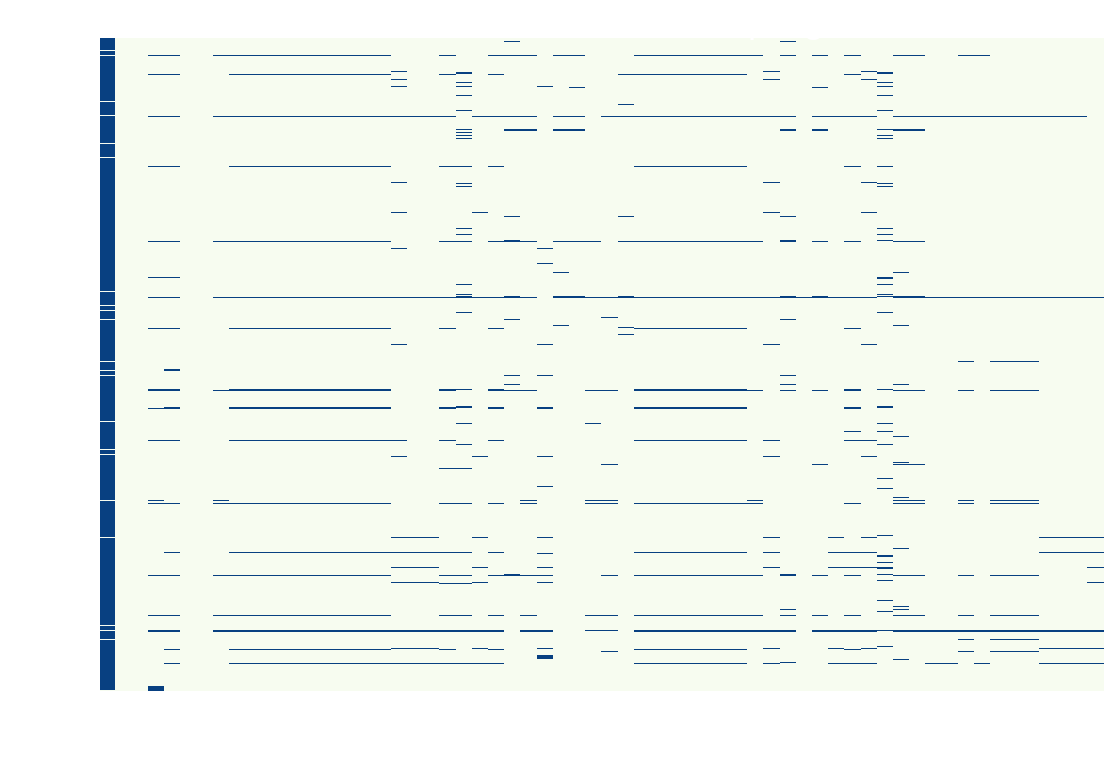

In [241]:
fig, ax = plt.subplots(figsize=(18,12))

ax.pcolor(data.loc[:, 'Case_shiller_index':].isnull(), cmap='GnBu')
ax.set_title('Null values after resampling',fontsize=36, color='w')
ax.tick_params('y', colors='w', labelsize=24)
ax.tick_params('x', colors='w', labelsize=24)
ax.set_ylabel("Data Rows", fontsize=30, color='w')
ax.set_xlabel("Data Columns", fontsize=30, color='w')
# ax.set_xticklabels(data.columns)
plt.show()

In [244]:
data.isnull().sum().sum()

12475L

In [221]:
data = data.fillna(method='ffill')

In [222]:
data = data.fillna(method='bfill')

In [242]:
data.shape

(3058, 64)

In [243]:
data.head()

,30mortgage,15mortgage,Case_shiller_index,us_libor,uk_libor,euro_libor,chf_libor,jpy_libor,us_effr,Eonia Rate,...,eur_gold,gbp_gold,chf_gold,jpy_gold,cad_gold,aud_gold,us_crude,eur_crude,chf_crude,dollar
Date,,,,,,,,,,,,,,,,,,,,,
2005-11-28,NaN,NaN,NaN,4.05250,4.51625,NaN,0.70500,0.04,4.01,2.11,...,420.84,291.78,650.91,597.85,584.39,680.10,57.28,48.35,74.79,90.90
2005-11-29,NaN,NaN,NaN,4.05375,4.70250,NaN,0.74167,0.04,3.99,2.09,...,424.22,289.51,656.11,594.46,583.85,674.52,56.44,47.97,74.19,91.59
2005-11-30,NaN,NaN,NaN,4.07750,4.75000,NaN,0.75000,0.04,4.03,2.06,...,419.20,286.96,649.84,591.06,577.95,668.98,57.28,48.59,75.32,91.51
2005-12-01,6.26,5.81,180.11,4.05188,4.43250,NaN,0.75000,0.04,4.03,2.04,...,427.93,290.05,661.70,602.52,585.84,678.26,58.48,49.82,77.04,91.77
2005-12-02,NaN,NaN,NaN,4.03563,4.74250,NaN,0.75000,0.04,4.00,1.80,...,429.32,290.89,662.15,607.20,586.59,676.29,59.19,50.53,77.93,91.88


In [163]:
data['Eonia Rate'][data['Eonia Rate'] == 0] = 0.3

#### *Saving and loading filled dataframe*

In [164]:
data.to_csv('data_filled.csv')

In [165]:
data = pd.read_csv('data_filled.csv')

In [166]:
data.Date = pd.to_datetime(data.Date)
data.set_index('Date', inplace=True)
data.head()

,30mortgage,15mortgage,Case_shiller_index,us_libor,uk_libor,euro_libor,chf_libor,jpy_libor,us_effr,Eonia Rate,...,eur_gold,gbp_gold,chf_gold,jpy_gold,cad_gold,aud_gold,us_crude,eur_crude,chf_crude,dollar
Date,,,,,,,,,,,,,,,,,,,,,
2005-11-28,6.26,5.81,180.11,4.05250,4.51625,2.27,0.70500,0.04,4.01,2.11,...,420.84,291.78,650.91,597.85,584.39,680.10,57.28,48.35,74.79,90.90
2005-11-29,6.26,5.81,180.11,4.05375,4.70250,2.27,0.74167,0.04,3.99,2.09,...,424.22,289.51,656.11,594.46,583.85,674.52,56.44,47.97,74.19,91.59
2005-11-30,6.26,5.81,180.11,4.07750,4.75000,2.27,0.75000,0.04,4.03,2.06,...,419.20,286.96,649.84,591.06,577.95,668.98,57.28,48.59,75.32,91.51
2005-12-01,6.26,5.81,180.11,4.05188,4.43250,2.27,0.75000,0.04,4.03,2.04,...,427.93,290.05,661.70,602.52,585.84,678.26,58.48,49.82,77.04,91.77
2005-12-02,6.26,5.81,180.11,4.03563,4.74250,2.27,0.75000,0.04,4.00,1.80,...,429.32,290.89,662.15,607.20,586.59,676.29,59.19,50.53,77.93,91.88


#### *Ten most positive correlated features*

In [167]:
corr_positive = pd.DataFrame(data.corr()['dollar'].sort_values(ascending=False)[:10])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Text yticklabel objects>)

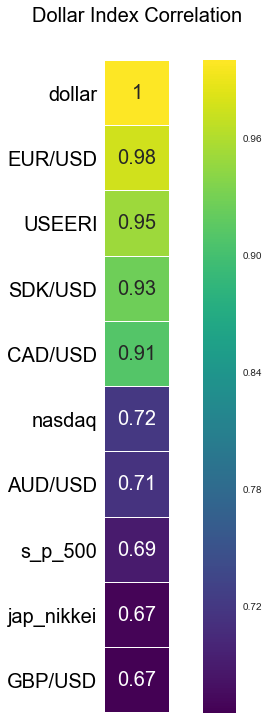

In [233]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Dollar Index Correlation', y=1.05, size=20, color='k')
sns.heatmap(corr_positive, cbar=True, linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white',\
            annot=True, annot_kws={"fontsize": 20}, xticklabels=" ")
plt.yticks(rotation=0, fontsize=20, color = 'k') 

#### *Ten most negative correlated features*

In [169]:
corr_negative = pd.DataFrame(data.corr()['dollar'].sort_values()[:10])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Text yticklabel objects>)

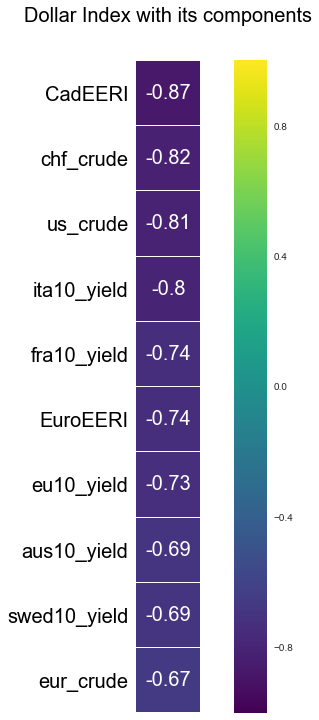

In [189]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Dollar Index with its components', y=1.05, size=20, color='k')
sns.heatmap(corr_negative, cbar=True, linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white',\
            annot=True, annot_kws={"fontsize": 20}, xticklabels=" ")
plt.yticks(rotation=0, fontsize=20, color = 'k') 


In [175]:
data.columns

Index([u'30mortgage', u'15mortgage', u'Case_shiller_index', u'us_libor',
       u'uk_libor', u'euro_libor', u'chf_libor', u'jpy_libor', u'us_effr',
       u'Eonia Rate', u'EURIBOR', u'SONIA', u'AusEERI', u'UKEERI', u'CadEERI',
       u'EuroEERI', u'JapEERI', u'SwisEERI', u'SwedEERI', u'USEERI',
       u'us_2year_bond_futures', u'us_10year_bond_futures',
       u'us_30year_bond_features', u'uk_gilt', u'jpy_bond_price',
       u'us10_yield', u'uk10_yield', u'swis10_yield', u'eu10_yield',
       u'can10_yield', u'swed10_yield', u'ger10_yield', u'fra10_yield',
       u'ita10_yield', u'aus10_yield', u'AUD/USD', u'CAD/USD', u'EUR/USD',
       u'GBP/USD', u'JPY/USD', u'SWF/USD', u'SDK/USD', u'cac_40', u's_p_500',
       u'Swis_smi_index', u'cad_50', u'ger_dax', u'us_dow', u'uk_ftse',
       u'nasdaq', u'jap_nikkei', u'swed_omx', u'eu_stoxx_50', u'us_gold',
       u'eur_gold', u'gbp_gold', u'chf_gold', u'jpy_gold', u'cad_gold',
       u'aud_gold', u'us_crude', u'eur_crude', u'chf_crude', u'dol

### Dollar/US LIBOR Rate positive correlation

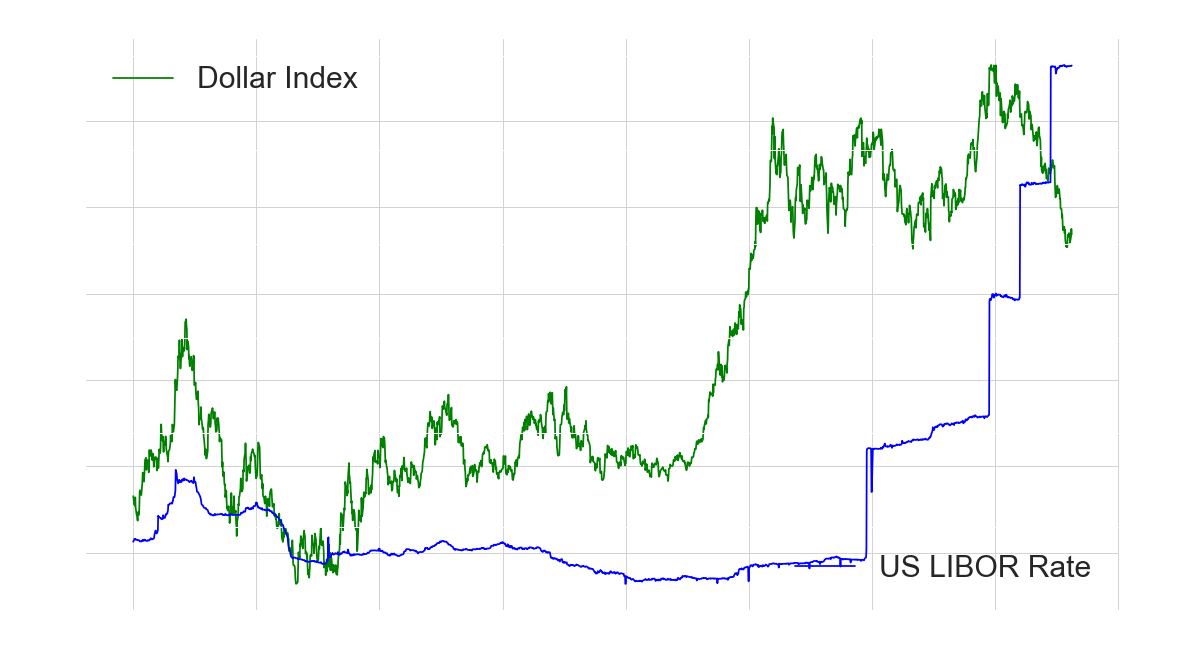

In [211]:
fig, ax1 = plt.subplots()
ax1.plot(data.loc['2010':,'dollar'], 'g')
ax1.set_ylabel('Dollar index', color='w', fontsize=30)
ax1.tick_params('y', colors='w', labelsize=24)
ax1.tick_params('x', colors='w', labelsize=24)
ax1.set_title('Dollar/US LIBOR Rate',fontsize=36, color='w')
ax1.set_facecolor('w')
ax1.grid(b=True, which='major', color='lightgrey', linestyle='-')
ax1.legend(['Dollar Index'], loc=2, fontsize=30)

ax2 = ax1.twinx()

ax2.plot(data.loc['2010':,'us_libor'], 'b')
ax2.set_ylabel('US LIBOR Rate', color='w', fontsize=30)
ax2.tick_params('y', colors='w', labelsize=24)
ax2.legend(['US LIBOR Rate'], loc=4, fontsize=30)

fig.set_size_inches(18.5, 10.5)

### Dollar/Crude oil negative correlation

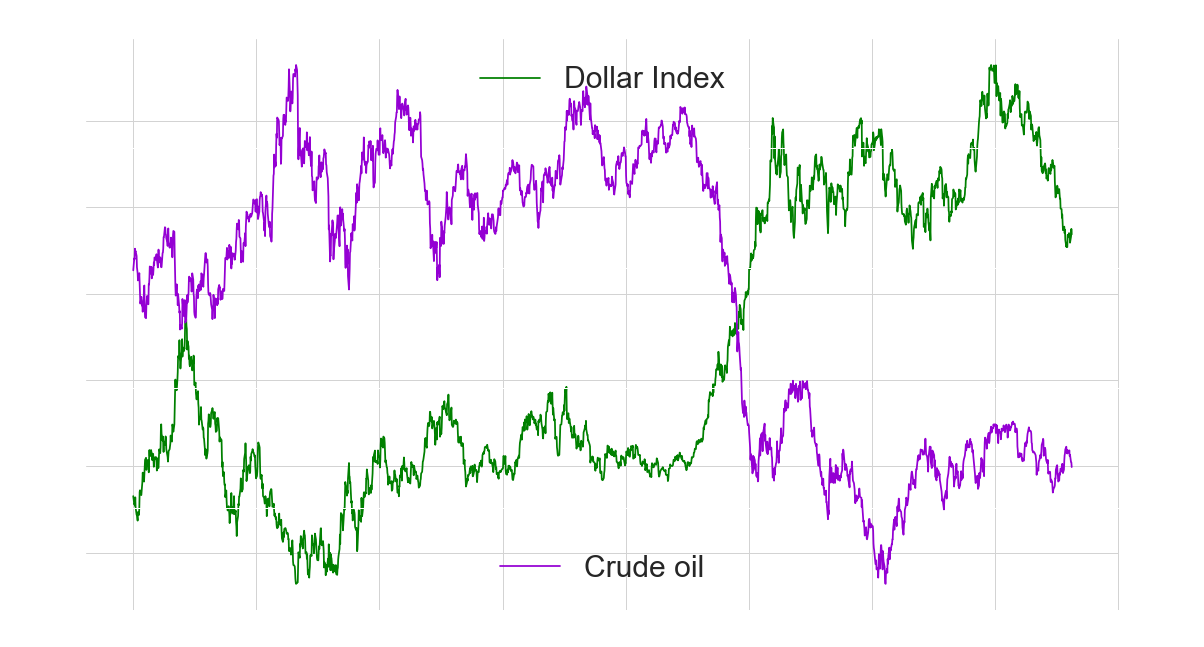

In [209]:
fig, ax1 = plt.subplots()
ax1.plot(data.loc['2010':,'dollar'], 'g')
ax1.set_ylabel('Dollar index', color='w', fontsize=30)
ax1.tick_params('y', colors='w', labelsize=24)
ax1.tick_params('x', colors='w', labelsize=24)
ax1.set_title('Dollar/Crude oil',fontsize=36, color='w')
ax1.set_facecolor('w')
ax1.grid(b=True, which='major', color='lightgrey', linestyle='-')
ax1.legend(['Dollar Index'], loc=9, fontsize=30)

ax2 = ax1.twinx()

ax2.plot(data.loc['2010':,'us_crude'], 'darkviolet')
ax2.set_ylabel('Crude oil', color='w', fontsize=30)
ax2.tick_params('y', colors='w', labelsize=24)
ax2.legend(['Crude oil'], loc=8, fontsize=30)

fig.set_size_inches(18.5, 10.5)

### Dollar/Gold negative correlation

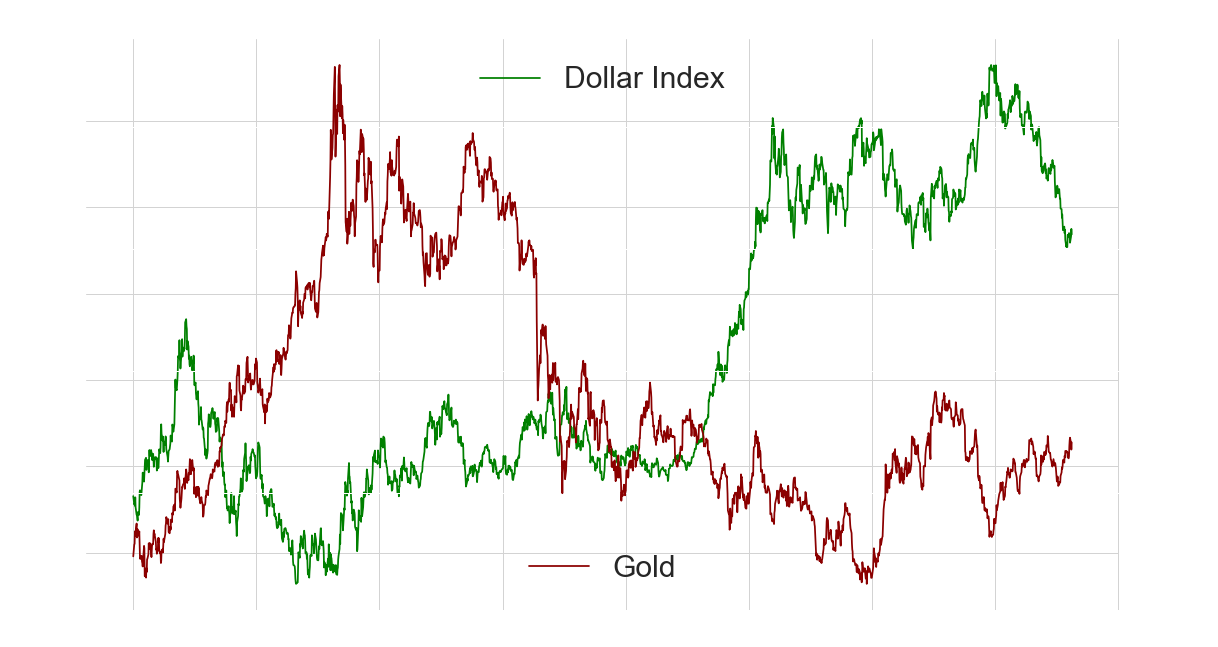

In [208]:
fig, ax1 = plt.subplots()
ax1.plot(data.loc['2010':,'dollar'], 'g')
ax1.set_ylabel('Dollar index', color='w', fontsize=30)
ax1.tick_params('y', colors='w', labelsize=24)
ax1.tick_params('x', colors='w', labelsize=24)
ax1.set_title('Dollar/Gold',fontsize=36, color='w')
ax1.set_facecolor('w')
ax1.grid(b=True, which='major', color='lightgrey', linestyle='-')
ax1.legend(['Dollar Index'], loc=9, fontsize=30)

ax2 = ax1.twinx()

ax2.plot(data.loc['2010':,'us_gold'], 'darkred')
ax2.set_ylabel('Gold', color='w', fontsize=30)
ax2.tick_params('y', colors='w', labelsize=24)
ax2.legend(['Gold'], loc=8, fontsize=30)

fig.set_size_inches(18.5, 10.5)

### Dollar/10 Year US Bond Yield negative correlation

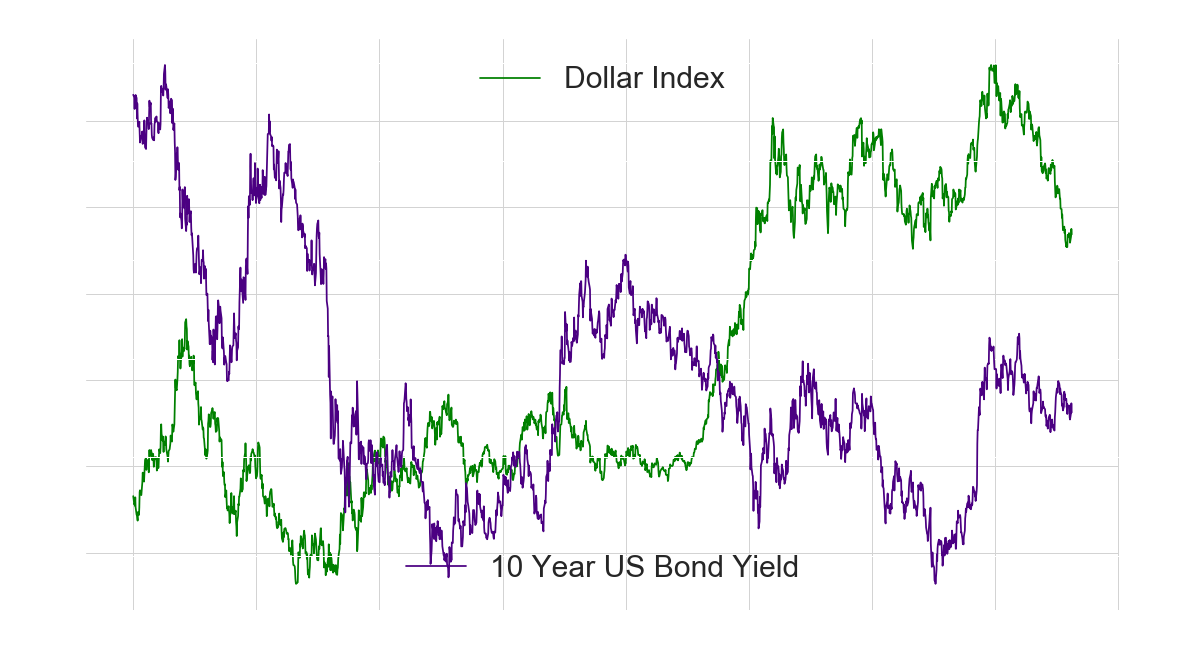

In [207]:
fig, ax1 = plt.subplots()
ax1.plot(data.loc['2010':,'dollar'], 'g')
ax1.set_ylabel('Dollar index', color='w', fontsize=30)
ax1.tick_params('y', colors='w', labelsize=24)
ax1.tick_params('x', colors='w', labelsize=24)
ax1.set_title('Dollar/10 Year US Bond Yield',fontsize=36, color='w')
ax1.set_facecolor('w')
ax1.grid(b=True, which='major', color='lightgrey', linestyle='-')
ax1.legend(['Dollar Index'], loc=9, fontsize=30)

ax2 = ax1.twinx()

ax2.plot(data.loc['2010':,'us10_yield'], 'indigo')
ax2.set_ylabel('10 Year US Bond Yield', color='w', fontsize=30)
ax2.tick_params('y', colors='w', labelsize=24)
ax2.legend(['10 Year US Bond Yield'], loc=8, fontsize=30)

fig.set_size_inches(18.5, 10.5)

### Dollar/Dow Jones Index positive correlation

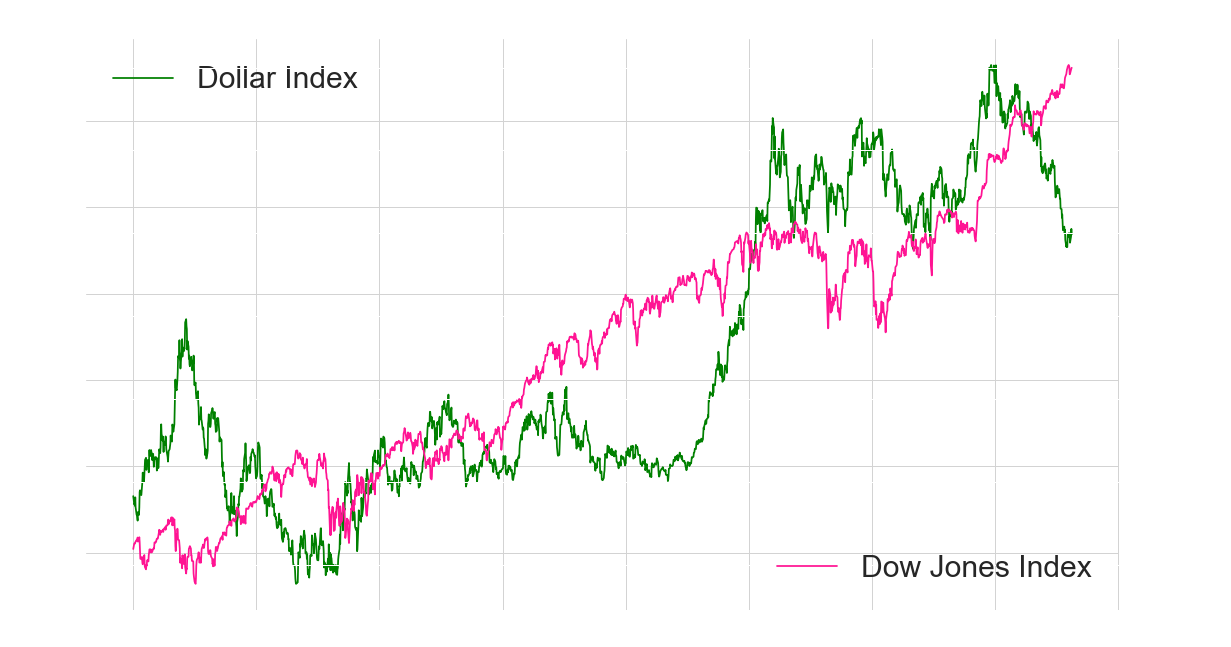

In [203]:
fig, ax1 = plt.subplots()
ax1.plot(data.loc['2010':,'dollar'], 'g')
ax1.set_ylabel('Dollar index', color='w', fontsize=30)
ax1.tick_params('y', colors='w', labelsize=24)
ax1.tick_params('x', colors='w', labelsize=24)
ax1.set_title('Dollar/Dow Jones',fontsize=36, color='w')
ax1.set_facecolor('w')
ax1.grid(b=True, which='major', color='lightgrey', linestyle='-')
ax1.legend(['Dollar Index'], loc=2, fontsize=30)
ax2 = ax1.twinx()

ax2.plot(data.loc['2010':,'us_dow'], 'deeppink')
ax2.set_ylabel('Dow Jones', color='w', fontsize=30)
ax2.tick_params('y', colors='w', labelsize=24)
ax2.legend(['Dow Jones Index'], loc=4, fontsize=30)
fig.set_size_inches(18.5, 10.5)

#### *Feature ingineering:*
<li> One day return
<li> Five day return
<li> Five day window standard deviation
<li> Five day window mean
<li> Five day window min
<li> Five day window max

In [130]:
# one and five days return
for column in data.columns:
    data[column + '_one_change'] = data[column].pct_change()
    
    data[column + '_five_change'] = data[column].pct_change(5) 

In [131]:
data.isnull().sum().sum()

384L

In [132]:
# create a mask to compute standard deviation and weighted mean
one_factors = [ x for x in data.columns if 'one_change' in x]

In [92]:
one_factors

['30mortgage_one_change',
 '15mortgage_one_change',
 'Case_shiller_index_one_change',
 'us_libor_one_change',
 'uk_libor_one_change',
 'euro_libor_one_change',
 'chf_libor_one_change',
 'jpy_libor_one_change',
 'us_effr_one_change',
 'Eonia Rate_one_change',
 'EURIBOR_one_change',
 'SONIA_one_change',
 'AusEERI_one_change',
 'UKEERI_one_change',
 'CadEERI_one_change',
 'EuroEERI_one_change',
 'JapEERI_one_change',
 'SwisEERI_one_change',
 'SwedEERI_one_change',
 'USEERI_one_change',
 'us_2year_bond_futures_one_change',
 'us_10year_bond_futures_one_change',
 'us_30year_bond_features_one_change',
 'uk_gilt_one_change',
 'jpy_bond_price_one_change',
 'us10_yield_one_change',
 'uk10_yield_one_change',
 'swis10_yield_one_change',
 'eu10_yield_one_change',
 'can10_yield_one_change',
 'swed10_yield_one_change',
 'ger10_yield_one_change',
 'fra10_yield_one_change',
 'ita10_yield_one_change',
 'aus10_yield_one_change',
 'AUD/USD_one_change',
 'CAD/USD_one_change',
 'EUR/USD_one_change',
 'GBP/U

In [133]:
# Subset the data to include only daily returns
returns = [ x for x in data.columns if '_change' in x]

In [134]:
data = data[returns]

In [135]:
data = data.iloc[1:,:]

In [96]:
data.head()

,30mortgage_one_change,30mortgage_five_change,15mortgage_one_change,15mortgage_five_change,Case_shiller_index_one_change,Case_shiller_index_five_change,us_libor_one_change,us_libor_five_change,uk_libor_one_change,uk_libor_five_change,...,aud_gold_one_change,aud_gold_five_change,us_crude_one_change,us_crude_five_change,eur_crude_one_change,eur_crude_five_change,chf_crude_one_change,chf_crude_five_change,dollar_one_change,dollar_five_change
Date,,,,,,,,,,,,,,,,,,,,,
2005-11-29,0.0,NaN,0.0,NaN,0.0,NaN,0.000308,NaN,0.041240,NaN,...,-0.008205,NaN,-0.014665,NaN,-0.007859,NaN,-0.008022,NaN,0.007591,NaN
2005-11-30,0.0,NaN,0.0,NaN,0.0,NaN,0.005859,NaN,0.010101,NaN,...,-0.008213,NaN,0.014883,NaN,0.012925,NaN,0.015231,NaN,-0.000873,NaN
2005-12-01,0.0,NaN,0.0,NaN,0.0,NaN,-0.006283,NaN,-0.066842,NaN,...,0.013872,NaN,0.020950,NaN,0.025314,NaN,0.022836,NaN,0.002841,NaN
2005-12-02,0.0,NaN,0.0,NaN,0.0,NaN,-0.004010,NaN,0.069938,NaN,...,-0.002904,NaN,0.012141,NaN,0.014251,NaN,0.011552,NaN,0.001199,NaN
2005-12-05,0.0,0.0,0.0,0.0,0.0,0.0,0.001702,-0.002468,0.007907,0.0584,...,0.005870,0.000235,0.012502,0.046264,0.005937,0.051293,0.004620,0.046798,-0.004680,0.006051


In [136]:
# compute five day standard deviation
for column in data[one_factors]:
    data[column + '_5d_std'] = data[column].rolling(window=5).std()

In [137]:
# compute five day mean
for column in data[one_factors]:
    data[column + '_5d_mean'] = data[column].rolling(window=5).mean()

In [138]:
# compute five day min
for column in data[one_factors]:
    data[column + '_5d_min'] = data[column].rolling(window=5).min()

In [139]:
# compute five day max
for column in data[one_factors]:
    data[column + '_5d_max'] = data[column].rolling(window=5).max()

In [140]:
data = data.iloc[4:,:]

In [141]:
data.isnull().sum().sum()

0L

#### *Create target - tommorow return*

In [142]:
data['returns'] = data.dollar_one_change.shift(-1)

In [143]:
data.columns

Index([u'30mortgage_one_change', u'30mortgage_five_change',
       u'15mortgage_one_change', u'15mortgage_five_change',
       u'Case_shiller_index_one_change', u'Case_shiller_index_five_change',
       u'us_libor_one_change', u'us_libor_five_change', u'uk_libor_one_change',
       u'uk_libor_five_change',
       ...
       u'gbp_gold_one_change_5d_max', u'chf_gold_one_change_5d_max',
       u'jpy_gold_one_change_5d_max', u'cad_gold_one_change_5d_max',
       u'aud_gold_one_change_5d_max', u'us_crude_one_change_5d_max',
       u'eur_crude_one_change_5d_max', u'chf_crude_one_change_5d_max',
       u'dollar_one_change_5d_max', u'returns'],
      dtype='object', length=385)

In [144]:
data = data.iloc[:-1, :]

In [151]:
# convert to binary to build classification models
data['target'] = data.returns.apply(lambda x: 1 if x > 0 else 0)
data.target[:10]

Date
2005-12-05    0
2005-12-06    1
2005-12-07    0
2005-12-08    0
2005-12-09    0
2005-12-12    1
2005-12-13    0
2005-12-14    1
2005-12-15    0
2005-12-16    1
Name: target, dtype: int64

In [152]:
# check the null values
data.isnull().values.sum()

0

In [147]:
# replace inf values with 0
data = data.replace([np.inf, -np.inf], 0)

#### *Saving the data*

In [153]:
data.to_csv('new_data.csv')